<a href="https://colab.research.google.com/github/hussaintaniya/stockpred/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [19]:
data = pd.read_csv('/wholettm.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9146 non-null   object 
 1   Open       9146 non-null   float64
 2   High       9146 non-null   float64
 3   Low        9146 non-null   float64
 4   Close      9146 non-null   float64
 5   Adj Close  9146 non-null   float64
 6   Volume     9146 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 500.3+ KB


In [20]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training

In [21]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(4452, 1)

In [22]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [23]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [24]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [25]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 17s - loss: 0.0065 - 17s/epoch - 489ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0013 - 8s/epoch - 234ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0012 - 8s/epoch - 234ms/step
Epoch 4/20
35/35 - 9s - loss: 9.1519e-04 - 9s/epoch - 252ms/step
Epoch 5/20
35/35 - 8s - loss: 8.0268e-04 - 8s/epoch - 221ms/step
Epoch 6/20
35/35 - 9s - loss: 8.3854e-04 - 9s/epoch - 245ms/step
Epoch 7/20
35/35 - 9s - loss: 9.7669e-04 - 9s/epoch - 253ms/step
Epoch 8/20
35/35 - 8s - loss: 6.9834e-04 - 8s/epoch - 218ms/step
Epoch 9/20
35/35 - 9s - loss: 6.3653e-04 - 9s/epoch - 253ms/step
Epoch 10/20
35/35 - 9s - loss: 6.3490e-04 - 9s/epoch - 252ms/step
Epoch 11/20
35/35 - 8s - loss: 7.4154e-04 - 8s/epoch - 216ms/step
Epoch 12/20
35/35 - 9s - loss: 7.6726e-04 - 9s/epoch - 253ms/step
Epoch 13/20
35/35 - 9s - loss: 7.2195e-04 - 9s/epoch - 252ms/step
Epoch 14/20
35/35 - 8s - loss: 6.4584e-04 - 8s/epoch - 218ms/step
Epoch 15/20
35/35 - 9s - loss: 6.1230e-04 - 9s/epoch - 251ms/step
Epoch 16/20
35/35 - 9s - loss

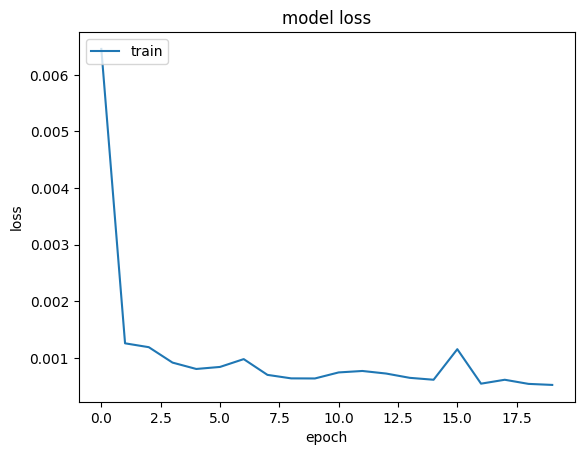

In [26]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
testData = pd.read_csv('/TestData.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1116, 60, 1)

In [28]:
y_pred = model.predict(X_test) #predicting the new values

35/35 [==============================] - 4s 80ms/step


In [29]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting

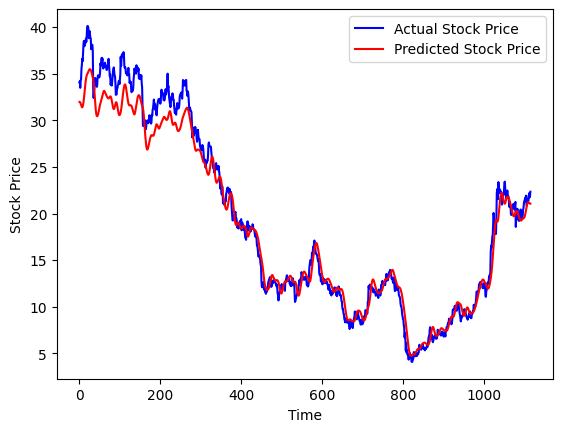

In [30]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()